In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline 

In [4]:
wine=pd.read_csv("/content/winequality-red.csv")

In [5]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


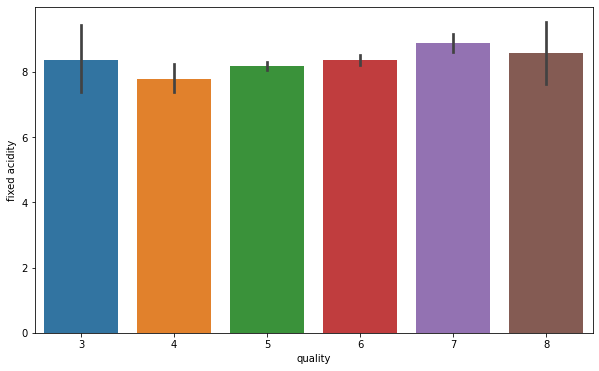

In [7]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x="quality", y="fixed acidity", data=wine)

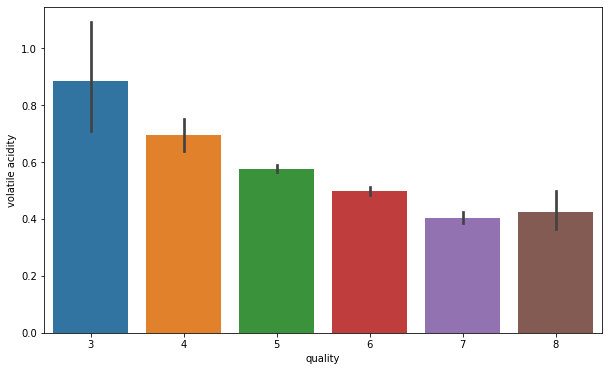

In [8]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x="quality", y="volatile acidity", data=wine)

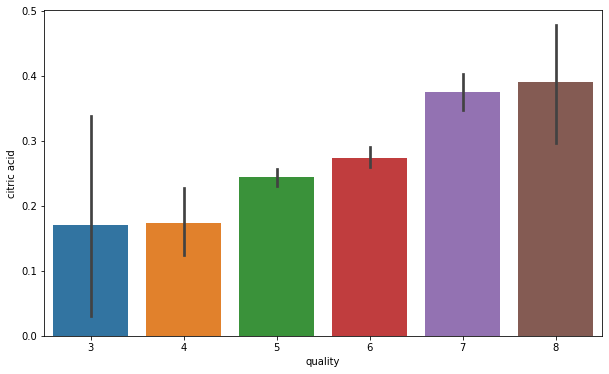

In [9]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x="quality", y="citric acid", data=wine)

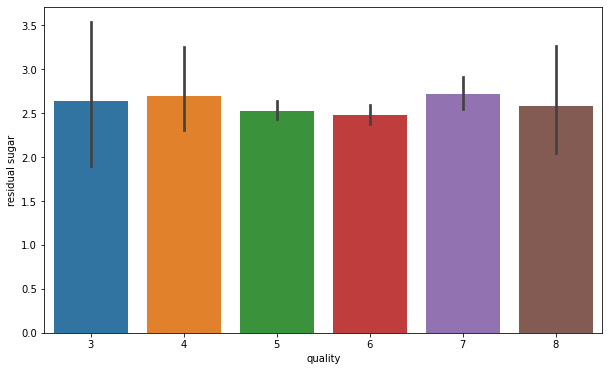

In [10]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x="quality", y="residual sugar", data=wine)

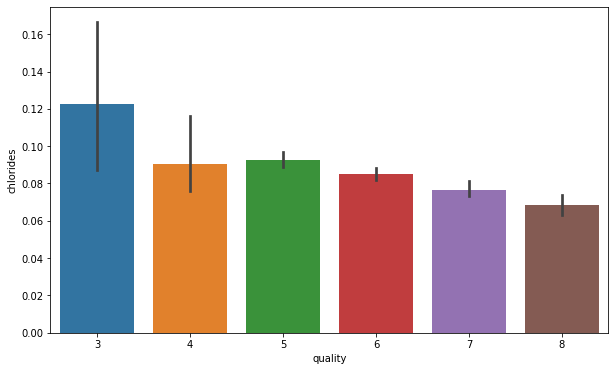

In [11]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x="quality", y="chlorides", data=wine)

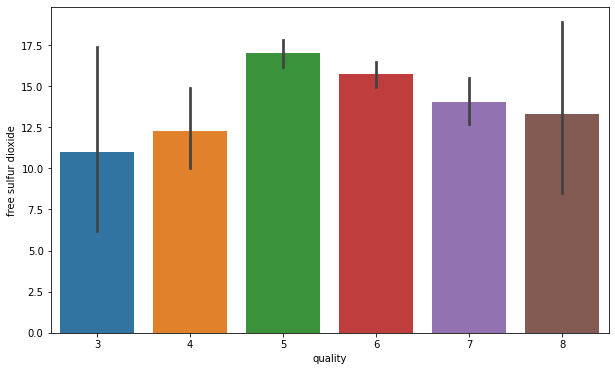

In [12]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x="quality", y="free sulfur dioxide", data=wine)

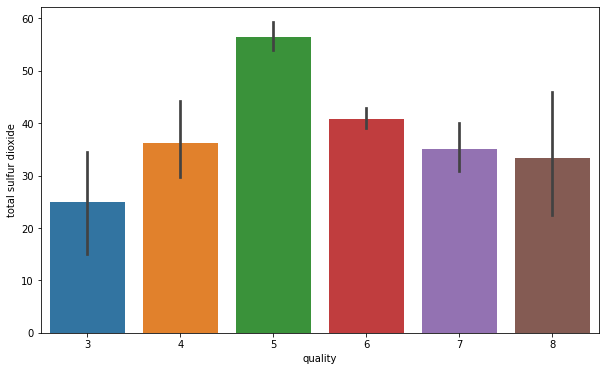

In [13]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x="quality", y="total sulfur dioxide", data=wine)

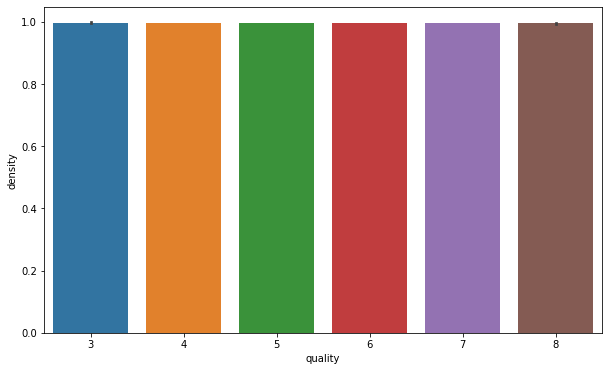

In [14]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x="quality", y="density", data=wine)

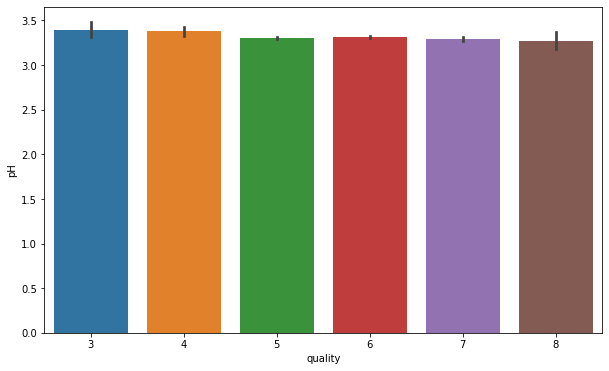

In [15]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x="quality", y="pH", data=wine)

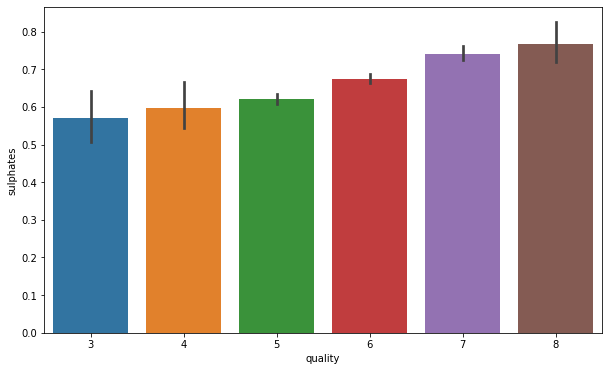

In [16]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x="quality", y="sulphates", data=wine)

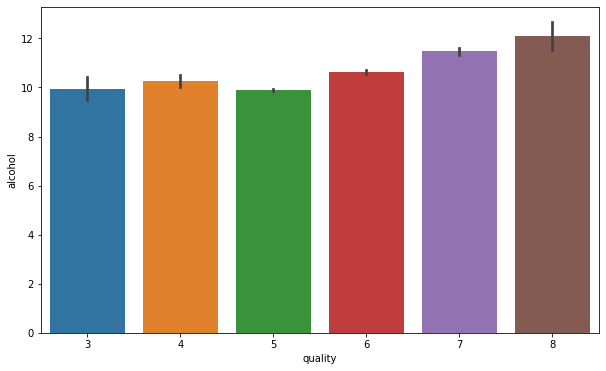

In [17]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x="quality", y="alcohol", data=wine)

In [18]:
bins=(2,6.5,8)
group_names=['bad','good']
wine['quality']=pd.cut(wine['quality'], bins=bins, labels=group_names)


In [19]:
label_quality=LabelEncoder()
wine['quality']=label_quality.fit_transform(wine['quality'])
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


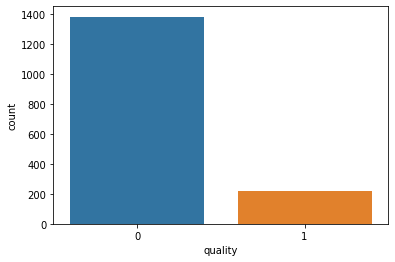

In [20]:
sns.countplot(wine['quality'])

In [21]:
X=wine.drop('quality', axis=1)
y=wine['quality']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [23]:
rfc=RandomForestClassifier( n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc=rfc.predict(X_test)

In [24]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.64      0.38      0.48        47

    accuracy                           0.88       320
   macro avg       0.77      0.67      0.71       320
weighted avg       0.86      0.88      0.86       320



In [25]:
print(confusion_matrix(y_test, pred_rfc))

[[263  10]
 [ 29  18]]


In [26]:
sgd=SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd=sgd.predict(X_test)

In [27]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       273
           1       0.36      0.28      0.31        47

    accuracy                           0.82       320
   macro avg       0.62      0.60      0.61       320
weighted avg       0.80      0.82      0.81       320



In [28]:
print(confusion_matrix(y_test,pred_sgd))

[[250  23]
 [ 34  13]]


In [29]:
svc=SVC()
svc.fit(X_train, y_train)
pred_svc=svc.predict(X_test)

In [30]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [31]:
print(confusion_matrix(y_test,pred_svc))

[[268   5]
 [ 35  12]]


In [32]:
param= {
    'C':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear','rbf'],
    'gamma':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc=GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [33]:
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [34]:
svc2=SVC(C=1.2, gamma=0.9, kernel='rbf')
svc2.fit(X_train, y_train)
pred_svc2=svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



In [35]:
rfc_eval=cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=10)
rfc_eval.mean()

0.9124630905511811